In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics as sm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor(random_state=0)

In [88]:
glass = pd.read_csv('glass_/GLASS_matrix_alphabet_NNdt*_1and2and3chains.csv', sep=',', header=None)
y = pd.read_csv('glass_/GLASS_y.csv')
y

,> <Tg (K)exp>\n
0,80.0
1,88.0
2,76.0
3,98.0
4,108.0
...,...
98,391.0
99,440.0
100,348.0
101,383.0


In [121]:
np_glass = glass.to_numpy()
np_glass

array([[0., 0., 3., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       ...,
       [0., 0., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
np.count_nonzero(np_glass)

1460

In [8]:
glass = preprocessing.normalize(glass)

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(glass, y, test_size=0.2, random_state=0)

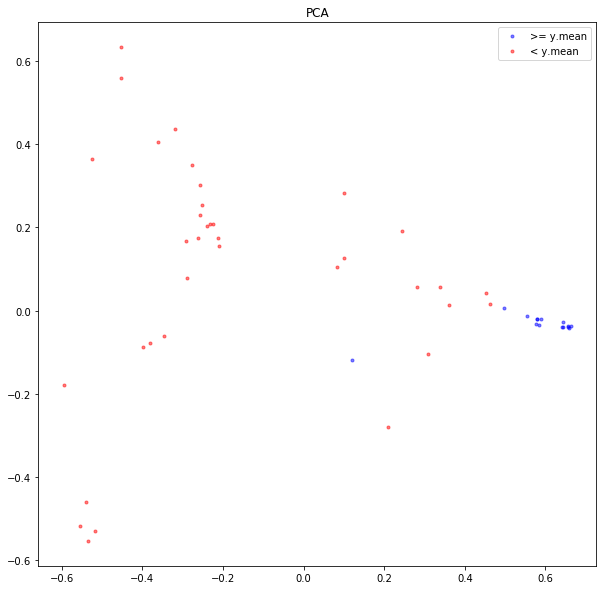

In [10]:
def plot_target(X, y, fraq=0.5, seed=9872):
    pca = PCA(n_components=2)
    projection = pca.fit_transform(X)

    a = np.where(y >= y.mean())[0]
    b = np.where(y < y.mean())[0]
    
    np.random.seed(seed)
    
    a = np.random.choice(a, size=int(fraq * a.shape[0]), replace=False)
    b = np.random.choice(b, size=int(fraq * b.shape[0]), replace=False)

    fig = plt.figure(figsize=(10, 10))
    plt.rcParams['legend.fontsize'] = 10

    plt.plot(projection[a, 0], projection[a, 1],
             'o', markersize=3, color='blue', alpha=0.5, label='>= y.mean')

    plt.plot(projection[b, 0], projection[b, 1],
             'o', markersize=3, color='red', alpha=0.5, label='< y.mean')

    plt.title('PCA')
    plt.legend()
    plt.show()
    
plot_target(glass, y)

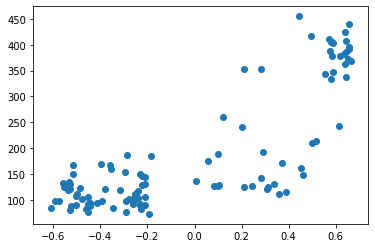

In [11]:
pca = PCA(n_components=4)
projection = pca.fit_transform(glass)
plt.scatter(projection[:, 0], y)

In [27]:
soil = pd.read_csv('SOIL/soil-1-1_matrix_alphabet_NNdt*_1and2and3chains.csv', sep=',', header=None)
y_soil = pd.read_csv('SOIL/soil-1-1_y.csv')
y_soil

,> <logKoc(exp)>,> <logKoc(cal)>,> <logKow(cal)>
0,1.40,1.60,1.18
1,1.43,1.56,1.10
2,1.95,2.12,1.99
3,1.94,1.98,1.64
4,1.57,1.64,1.30
...,...,...,...
323,2.16,2.55,3.51
324,1.98,2.13,2.14
325,1.87,1.81,1.69
326,1.80,1.75,1.57


In [16]:
# soil = preprocessing.normalize(soil)

In [17]:
y_soil.columns

Index(['>  <logKoc(exp)> ', '>  <logKoc(cal)> ', '>  <logKow(cal)> '], dtype='object')

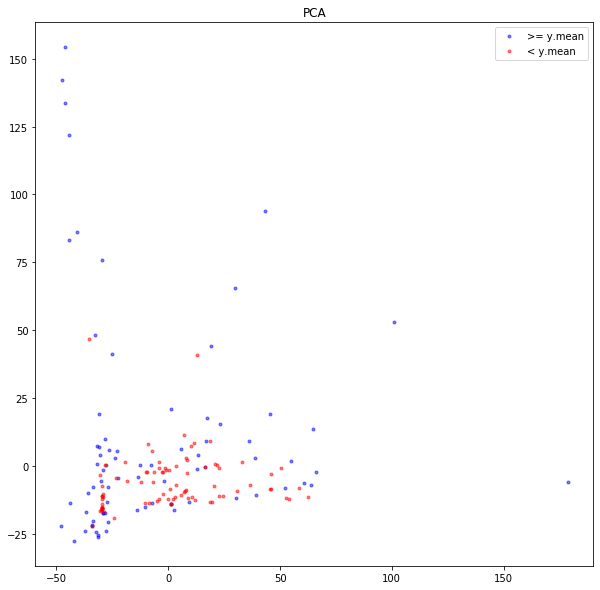

In [28]:
plot_target(soil, y_soil['>  <logKoc(exp)> '])

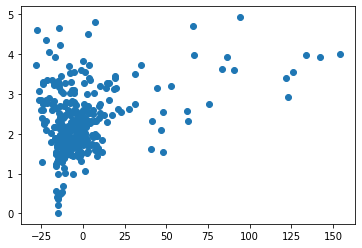

In [29]:
pca = PCA(n_components=2)
projection = pca.fit_transform(soil)
plt.scatter(projection[:, 1], y_soil['>  <logKoc(exp)> '])

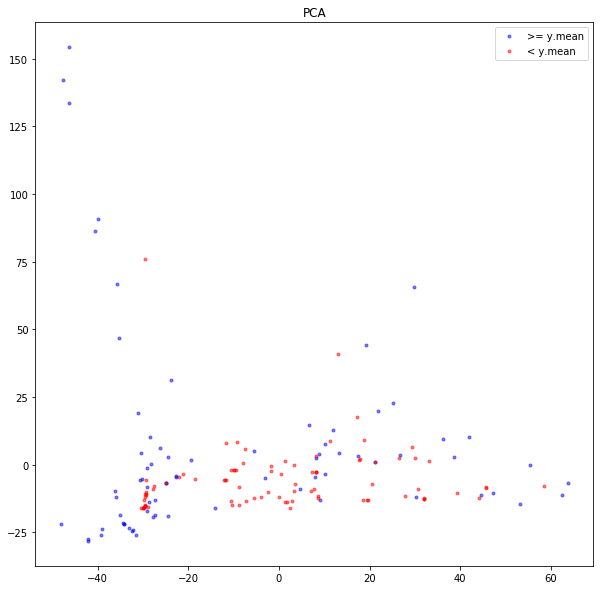

In [30]:
plot_target(soil, y_soil['>  <logKoc(cal)> '])

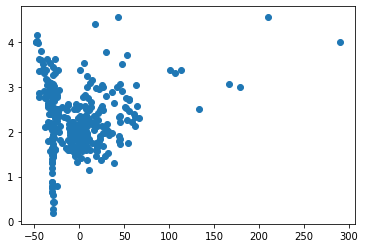

In [31]:
pca = PCA(n_components=2)
projection = pca.fit_transform(soil)
plt.scatter(projection[:, 0], y_soil['>  <logKoc(cal)> '])

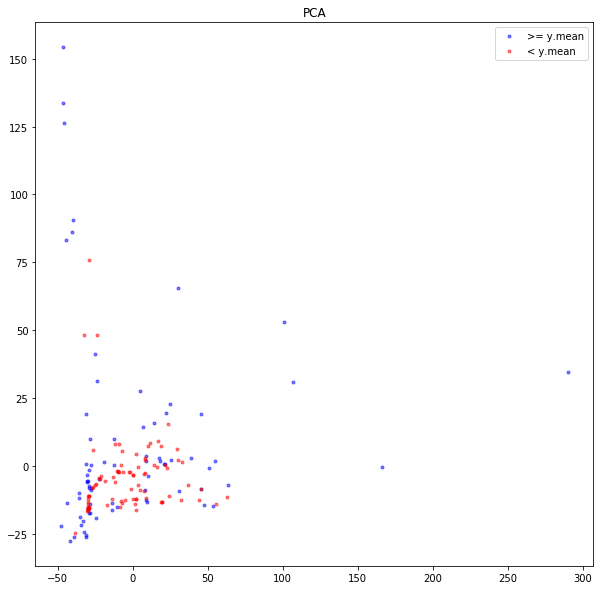

In [32]:
plot_target(soil, y_soil['>  <logKow(cal)> '])

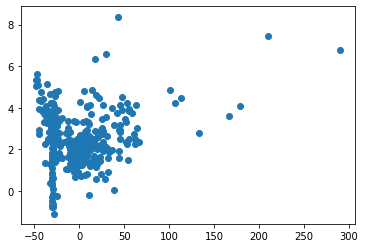

In [33]:
pca = PCA(n_components=2)
projection = pca.fit_transform(soil)
plt.scatter(projection[:, 0], y_soil['>  <logKow(cal)> '])

## Найдем матрицу расстояний. Расстояние евклидово и манхэттенское:

In [34]:
from sklearn.metrics.pairwise import pairwise_distances

In [37]:
D_euclid = pairwise_distances(soil, metric='euclidean')

In [38]:
D_euclid

array([[  0.        ,  55.42562584,  24.14539294, ...,  67.49814812,
         66.55073253, 170.2380686 ],
       [ 55.42562584,   0.        ,  54.63515352, ...,  56.69215113,
         60.88513776, 166.0090359 ],
       [ 24.14539294,  54.63515352,   0.        , ...,  64.17943596,
         67.30527468, 170.86837039],
       ...,
       [ 67.49814812,  56.69215113,  64.17943596, ...,   0.        ,
         28.44292531, 152.46966911],
       [ 66.55073253,  60.88513776,  67.30527468, ...,  28.44292531,
          0.        , 153.64244205],
       [170.2380686 , 166.0090359 , 170.86837039, ..., 152.46966911,
        153.64244205,   0.        ]])

In [78]:
D_manh = pairwise_distances(soil, metric= 'manhattan')

In [79]:
D_manh

array([[  0., 126.,  61., ..., 242., 215., 735.],
       [126.,   0.,  99., ..., 200., 219., 725.],
       [ 61.,  99.,   0., ..., 217., 236., 742.],
       ...,
       [242., 200., 217., ...,   0.,  71., 695.],
       [215., 219., 236., ...,  71.,   0., 688.],
       [735., 725., 742., ..., 695., 688.,   0.]])

## Поищем кластеры с помощью DBSCAN:

In [41]:
from sklearn.cluster import DBSCAN

In [113]:
clustering_manh = DBSCAN(eps=400, min_samples=2).fit(D_manh)

In [114]:
clustering_manh.labels_

array([-1,  0,  1, -1,  2, -1,  1,  2,  2,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  5, -1,  6,
        6, -1,  7,  7,  7, -1, -1,  8,  9,  9, -1,  9,  8, -1, -1,  8,  3,
        3, -1, -1, 10, 10, -1, -1, 11, 11, 11, 11, 11, -1, -1, -1, 12, 13,
       12, 12, -1, 14, 14, 15, 11,  4, -1,  5, -1, -1, -1, -1, -1, -1, -1,
       16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, 17, 18, 17, -1, 18, -1, -1, -1, -1, -1, -1, 16,
       -1, -1, 19, 19, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  8, -1, -1, -1, -1, 20, 20, -1, -1, 21,  3, -1,  3, -1, 21, -1,
       -1, -1, -1, -1, -1, -1, -1, 22, 22, -1, -1, -1,  3, -1, -1, -1, 23,
       23, -1, -1, -1, -1, -1, -1, -1, 24, -1, 24, -1, -1,  3,  8,  3, -1,
        4, 11, 13, 12, 25, 25, 25, 14, 15, 11, 22, 11, 12, 12, -1, 11, 11,
       11, 11, -1, -1, 11, -1, -1, -1,  0, -1, -1, -1, 26, 27, 28, 29, -1,
       26, 30, 31, 30, -1

In [103]:
clustering_euclid = DBSCAN(eps=200, min_samples=2, algorithm='kd_tree').fit(D_euclid)

In [104]:
clustering_euclid.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  2,  2,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  3,  0,  0, -1,  1, -1,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  4,  4, -1,  5,  5, -1, -1, -1,  4, -1,  6, -1, -1, -1, -1,
       -1,  0,  0,  1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  3, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  3,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  7

## Попробуем использовать несколько главных компонент для поиска кластеров

In [83]:
pca = PCA(n_components=20)
soil_pca = pca.fit_transform(soil)

In [86]:
D_manh_pca = pairwise_distances(soil_pca, metric='manhattan')
D_manh_pca.shape

(328, 328)

In [92]:
clustering_manh_pca = DBSCAN(eps=1000, min_samples=2).fit(D_manh_pca)
clustering_manh_pca.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  2,  2,  2,  2,  0, -1, -1,  2, -1,  0,  0,  3,  3, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  4, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,  4,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [94]:
clustering_manh_pca.get_params()

{'algorithm': 'auto',
 'eps': 1000,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 2,
 'n_jobs': None,
 'p': None}

## Поищем кластеры в выборке glass

In [119]:
D = pairwise_distances(glass, metric='manhattan')
D

array([[   0.,   29.,   46., ..., 4921., 6748., 2944.],
       [  29.,    0.,   75., ..., 4934., 6761., 2957.],
       [  46.,   75.,    0., ..., 4921., 6748., 2944.],
       ...,
       [4921., 4934., 4921., ...,    0., 2867., 2655.],
       [6748., 6761., 6748., ..., 2867.,    0., 3828.],
       [2944., 2957., 2944., ..., 2655., 3828.,    0.]])

In [120]:
clustering = DBSCAN(eps=400, min_samples=2).fit(D)
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1])

## Преобразуем в разреженную матрицу для построения spanning tree

In [124]:
from scipy import sparse
from scipy.sparse.csgraph import minimum_spanning_tree

In [123]:
sglass = sparse.csr_matrix(np_glass) 

In [125]:
sp_tree_glass = minimum_spanning_tree(sglass)

ValueError: compressed-sparse graph must be shape (N, N)